<a href="https://colab.research.google.com/github/purushothaman0712/project/blob/main/runge_kutta_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motion of charged particle in E and B fields using 4th-order Runge–Kutta (lorentz force law)

Runge–Kutta method is widely used in physics to obtain numerical solutions of differential equations arising in mechanics, electromagnetism, quantum mechanics, nuclear physics, and astrophysics. Typical applications include motion of a particle with air resistance, projectile motion, oscillations of pendulum and spring, RLC circuits, radioactive decay, planetary motion, and time-dependent Schrödinger equation.

  k values                                          velocity
0      k1v  [-0.9046015699037223, -0.42625813740029717, 0.0]
1      k2v   [-0.9067328605907238, -0.4217351295507786, 0.0]
2      k3v  [-0.9067102455514762, -0.42172447309734357, 0.0]
3      k4v   [-0.9088188146346957, -0.4171910349447824, 0.0]
  k values                                         position
0      k1p  [0.42625813740029717, -0.9046015699037223, 1.0]
1      k2p   [0.4217351295507786, -0.9067328605907238, 1.0]
2      k3p  [0.42172447309734357, -0.9067102455514762, 1.0]
3      k4p   [0.4171910349447824, -0.9088188146346957, 1.0]
update velocity= [ 0.41719096 -0.90881885  1.        ]
update position= [ 0.90881885 -0.58280904 19.99      ]


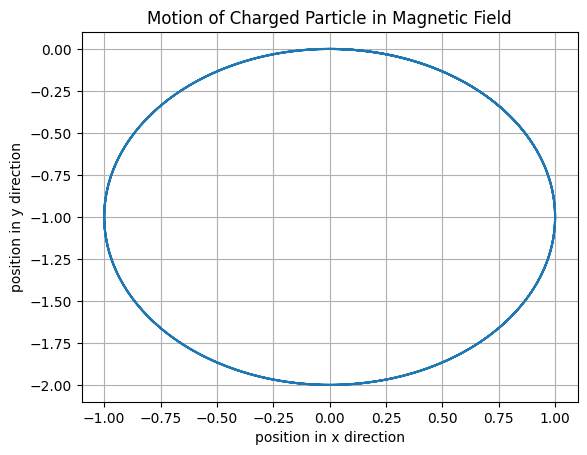

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pu

# Physical constants
q = 1.0      # charge of the particle
m = 1.0      # mass of the particle

# Electric field (Ex, Ey, Ez)
E = np.array([0.0, 0.0, 0.0])  # electric field vector (Ex, Ey, Ez)

# Magnetic field (Bx, By, Bz)
B = np.array([0.0, 0.0, 1.0])  # magnetic field vector (Bx, By, Bz)

# Time parameters
dt = 0.01          # small time step
tmax = 20          # total simulation time
n = int(tmax/dt)   # number of steps

# Arrays
r = np.zeros((n,3))   # position vector (x, y, z) for each time step
v = np.zeros((n,3))   # velocity vector (vx, vy, vz)
t = np.zeros(n)       # time array

# Initial conditions
r[0] = [0, 0, 0]   # Initial position
v[0] = [1, 0, 1]   # Initial velocity
# So particle starts moving in x and z directions

# Function for acceleration (Lorentz force)
def acceleration(v):
    return (q/m) * (E + np.cross(v, B))  # np.cross(v, B) → computes V x B
    # Returns acceleration vector

# RK4 loop
for i in range(n-1):
    # Loop over time steps
    # Update time value
    t[i+1] = t[i] + dt

    # k1 (initial slope)
    k1v = acceleration(v[i])                 # slope of velocity (acceleration)
    k1r = v[i]                               # slope of position = velocity

    # k2 (midpoint slope)
    # Estimate velocity at midpoint using k1
    # Compute new acceleration there
    k2v = acceleration(v[i] + 0.5*dt*k1v)
    k2r = v[i] + 0.5*dt*k1v

    # k3 (another midpoint slope)
    # Again estimate at midpoint
    # Improves accuracy
    k3v = acceleration(v[i] + 0.5*dt*k2v)
    k3r = v[i] + 0.5*dt*k2v

    # k4 (end slope)
    # Estimate slope at end of interval
    k4v = acceleration(v[i] + dt*k3v)
    k4r = v[i] + dt*k3v

    # Final RK4 update
    v[i+1] = v[i] + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)   # Updates velocity
    r[i+1] = r[i] + (dt/6)*(k1r + 2*k2r + 2*k3r + k4r)   # Updates position

# print the k values
# print the velocity values
b={"k values":["k1v","k2v","k3v","k4v"],"velocity":[k1v,k2v,k3v,k4v]}
b=pu.DataFrame(b)
print(b)
# print the position values
a={"k values":["k1p","k2p","k3p","k4p"],"position":[k1r,k2r,k3r,k4r]}
a=pu.DataFrame(a)
print(a)
# print the update velocity and position values
print("update velocity=",v[i+1])
print("update position=",r[i+1])


# Plot trajectory
# r[:,0] → x-coordinates
# r[:,1] → y-coordinates
# Shows circular motion (due to magnetic field)
plt.plot(r[:,0], r[:,1])
plt.xlabel("position in x direction")  # It shows how far the particle has moved. horizontally Mathematically:x(t)
plt.ylabel("position in y direction")  # It shows how far the particle has moved. vertically Mathematically:y(t)
plt.title("Motion of Charged Particle in Magnetic Field")
plt.grid()
plt.show()